#                   <font color='red'>                        Waves prediction using LSTM </font> 
![](https://bestanimations.com/Nature/Water/wave-ocean-animated-gif-8.gif)
![](https://i.giphy.com/media/4B9havABFnB2U/giphy.webp)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
df=pd.read_csv('Coastal Data System - Waves (Mooloolaba) 01-2017 to 06 - 2019.csv')

In [3]:
df

,Date/Time,Hs,Hmax,Tz,Tp,Peak Direction,SST
0,01/01/2017 00:00,-99.900,-99.90,-99.900,-99.900,-99.9,-99.90
1,01/01/2017 00:30,0.875,1.39,4.421,4.506,-99.9,-99.90
2,01/01/2017 01:00,0.763,1.15,4.520,5.513,49.0,25.65
3,01/01/2017 01:30,0.770,1.41,4.582,5.647,75.0,25.50
4,01/01/2017 02:00,0.747,1.16,4.515,5.083,91.0,25.45
...,...,...,...,...,...,...,...
43723,30/06/2019 21:30,2.299,3.60,9.281,12.765,94.0,21.95
43724,30/06/2019 22:00,2.075,3.04,9.303,12.722,95.0,21.95
43725,30/06/2019 22:30,2.157,3.43,9.168,12.890,97.0,21.95
43726,30/06/2019 23:00,2.087,2.84,8.706,10.963,92.0,21.95


In [4]:
df.describe()

,Hs,Hmax,Tz,Tp,Peak Direction,SST
count,43728.000000,43728.000000,43728.000000,43728.000000,43728.000000,43728.000000
mean,1.041140,1.891779,5.412332,8.794887,97.395310,23.207409
std,4.485922,4.580826,4.739317,5.358859,28.782966,9.813377
min,-99.900000,-99.900000,-99.900000,-99.900000,-99.900000,-99.900000
25%,0.838000,1.410000,4.974000,7.286000,85.000000,21.900000
50%,1.129000,1.900000,5.525000,8.881000,99.000000,23.950000
75%,1.542000,2.600000,6.162000,10.663250,116.000000,26.050000
max,4.257000,7.906000,10.921000,21.121000,358.000000,28.650000


# <font color='red'>Look for missing data</font>

In [5]:
missing_data=df.isnull()
missing_data

,Date/Time,Hs,Hmax,Tz,Tp,Peak Direction,SST
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
43723,False,False,False,False,False,False,False
43724,False,False,False,False,False,False,False
43725,False,False,False,False,False,False,False
43726,False,False,False,False,False,False,False


In [6]:
missing_data.columns.values.tolist()

['Date/Time', 'Hs', 'Hmax', 'Tz', 'Tp', 'Peak Direction', 'SST']

In [7]:
missing_data['Hs'].value_counts()

False    43728
Name: Hs, dtype: int64

## <font color='red'>Apparently there's no missing data, let's check it graphically</font>

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

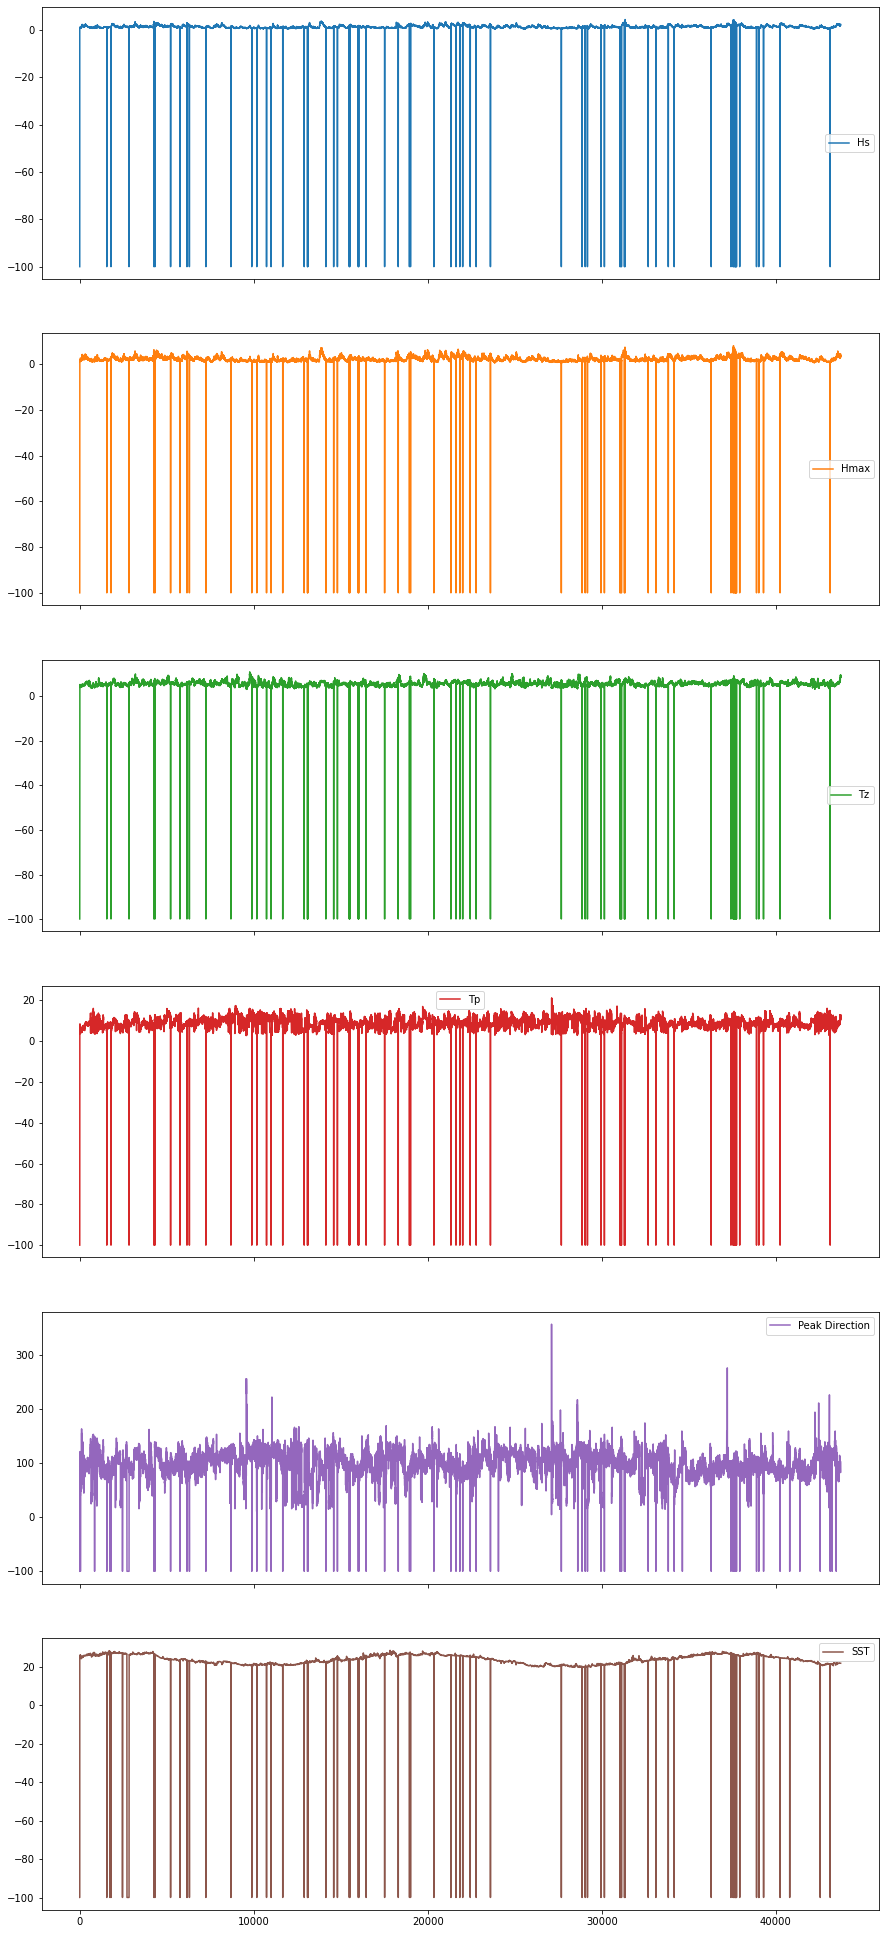

In [8]:
df.plot(subplots=True, figsize=(15, 35))

<AxesSubplot:>

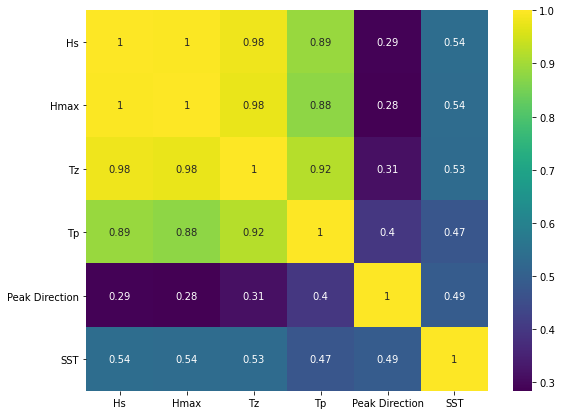

In [9]:
plt.figure(figsize=[9, 7])
sns.heatmap(df.corr(), annot=True,  cmap='viridis')

# <font color='red'>There is clearly an irregularity in the dataset</font>

### <font color='red'>values of -99.90 will be replaced as null</font>

In [10]:
df.replace(-99.90, np.nan, inplace=True)

In [11]:
missing_data=df.isnull()
missing_data

,Date/Time,Hs,Hmax,Tz,Tp,Peak Direction,SST
0,False,True,True,True,True,True,True
1,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
43723,False,False,False,False,False,False,False
43724,False,False,False,False,False,False,False
43725,False,False,False,False,False,False,False
43726,False,False,False,False,False,False,False


## <font color='red'>True stands for null </font>

### <font color='red'>let's check the column 'Hs' to see how many null values there are</font>

In [12]:
missing_data['Hs'].value_counts()

False    43643
True        85
Name: Hs, dtype: int64

## <font color='blue'>Do we need to get rid of those values?</font>

### <font color='blue'>No, let us replace by the mean</font>

In [13]:
avr_norm_loss_Hs=df['Hs'].astype('float').mean(axis=0)
avr_norm_loss_Hmax=df['Hmax'].astype('float').mean(axis=0)
avr_norm_loss_Tz=df['Tz'].astype('float').mean(axis=0)
avr_norm_loss_Tp=df['Tp'].astype('float').mean(axis=0)
avr_norm_loss_Peak_Direction=df['Peak Direction'].astype('float').mean(axis=0)
avr_norm_loss_SST=df['SST'].astype('float').mean(axis=0)

In [14]:
df['Hs'].replace(np.nan, avr_norm_loss_Hs, inplace=True)
df['Hmax'].replace(np.nan, avr_norm_loss_Hmax, inplace=True)
df['Tz'].replace(np.nan, avr_norm_loss_Tz, inplace=True)
df['Tp'].replace(np.nan, avr_norm_loss_Tp, inplace=True)
df['Peak Direction'].replace(np.nan, avr_norm_loss_Peak_Direction, inplace=True)
df['SST'].replace(np.nan, avr_norm_loss_SST, inplace=True)

In [15]:
missing_data=df.isnull()
missing_data

,Date/Time,Hs,Hmax,Tz,Tp,Peak Direction,SST
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
43723,False,False,False,False,False,False,False
43724,False,False,False,False,False,False,False
43725,False,False,False,False,False,False,False
43726,False,False,False,False,False,False,False


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

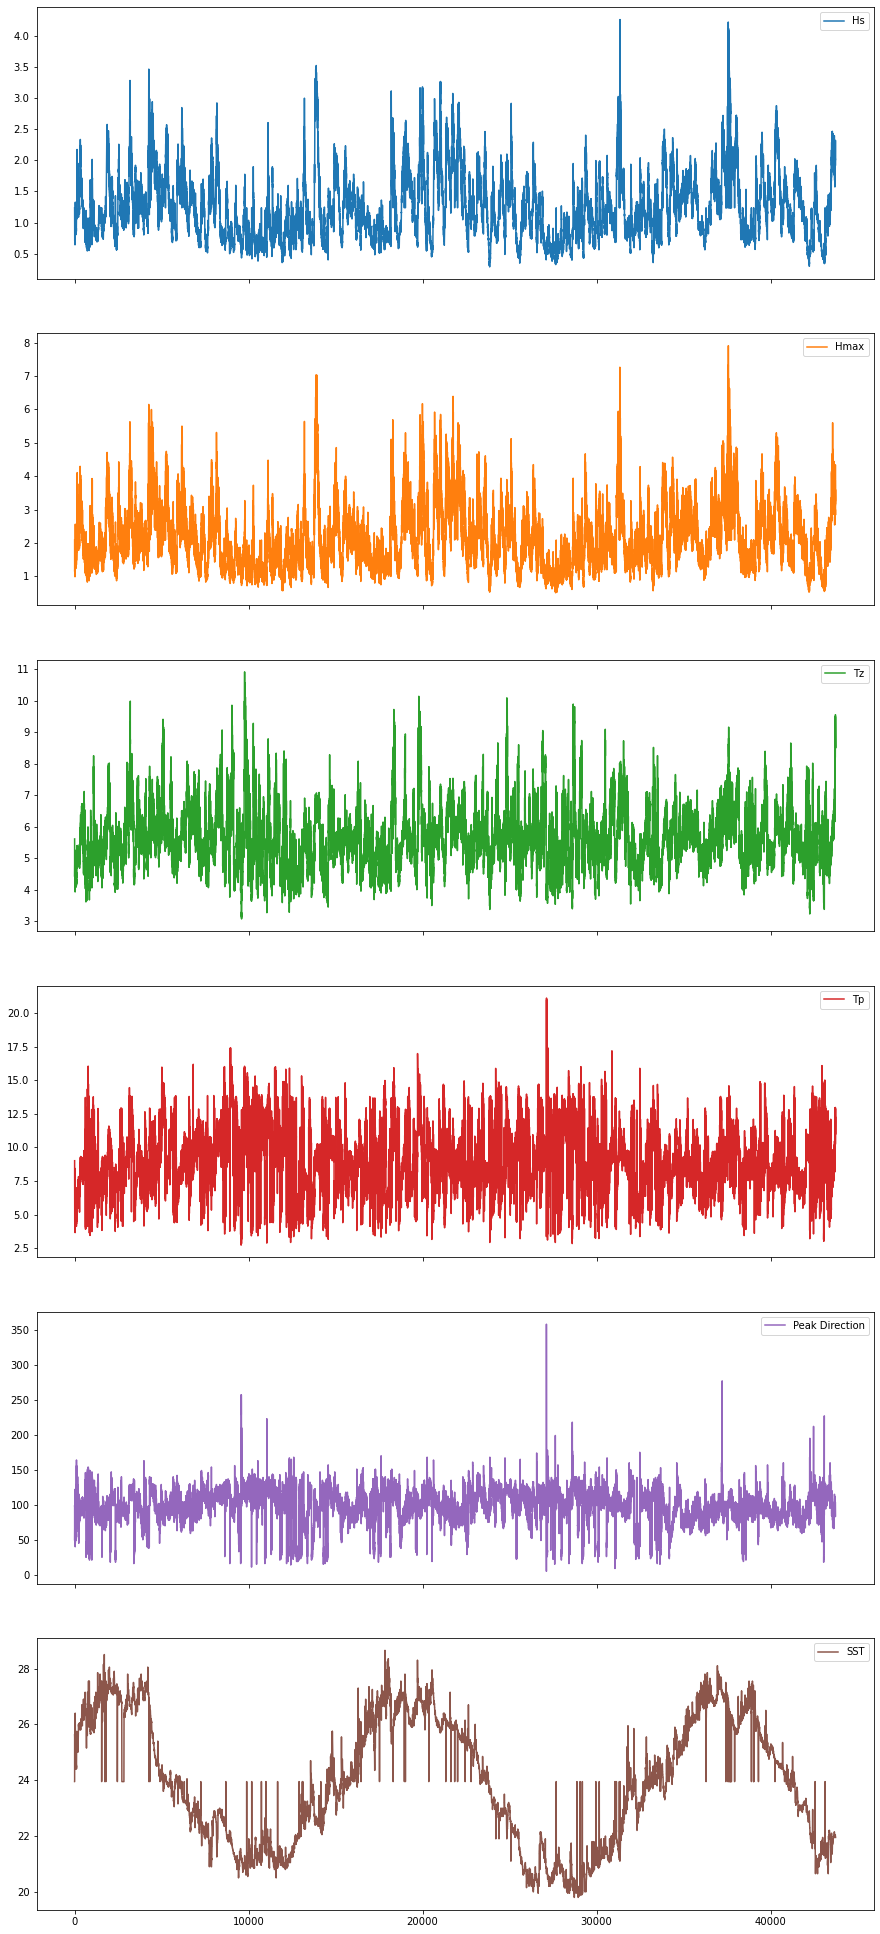

In [16]:
df.plot(subplots=True, figsize=(15, 35))

<AxesSubplot:>

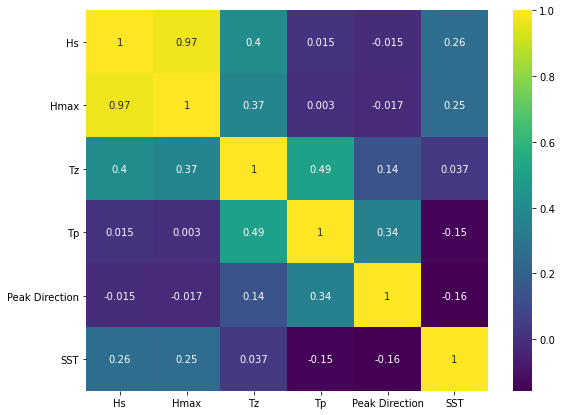

In [17]:
plt.figure(figsize=[9, 7])
sns.heatmap(df.corr(), annot=True,  cmap='viridis')

# <font color='green'>Data normalization</font>

In [18]:
df['Hs']=(df['Hs']-df['Hs'].min())/(df['Hs'].max()-df['Hs'].min())
df['Hmax']=(df['Hmax']-df['Hmax'].min())/(df['Hmax'].max()-df['Hmax'].min())
df['Tz']=(df['Tz']-df['Tz'].min())/(df['Tz'].max()-df['Tz'].min())
df['Tp']=(df['Tp']-df['Tp'].min())/(df['Tp'].max()-df['Tp'].min())
df['Peak Direction']=(df['Peak Direction']-df['Peak Direction'].min())/(df['Peak Direction'].max()-df['Peak Direction'].min())
df['SST']=(df['SST']-df['SST'].min())/(df['SST'].max()-df['SST'].min())

In [19]:
df.drop('Date/Time', axis=1, inplace=True)
df

,Hs,Hmax,Tz,Tp,Peak Direction,SST
0,0.238136,0.213633,0.323957,0.341644,0.265228,0.468866
1,0.146606,0.118983,0.171447,0.097060,0.265228,0.468866
2,0.118345,0.086533,0.184066,0.151785,0.124646,0.661017
3,0.120111,0.121687,0.191969,0.159067,0.198300,0.644068
4,0.114307,0.087885,0.183429,0.128417,0.243626,0.638418
...,...,...,...,...,...,...
43723,0.505930,0.417793,0.790950,0.545894,0.252125,0.242938
43724,0.449407,0.342077,0.793754,0.543557,0.254958,0.242938
43725,0.470098,0.394808,0.776546,0.552687,0.260623,0.242938
43726,0.452435,0.315035,0.717655,0.447965,0.246459,0.242938


In [20]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(df)
training_set_scaled

array([[0.23813645, 0.2136331 , 0.32395668, 0.34164356, 0.26522848,
        0.46886598],
       [0.14660611, 0.11898323, 0.17144678, 0.09705994, 0.26522848,
        0.46886598],
       [0.11834469, 0.08653326, 0.18406628, 0.15178523, 0.12464589,
        0.66101695],
       ...,
       [0.47009841, 0.394808  , 0.77654557, 0.55268735, 0.26062323,
        0.24293785],
       [0.45243502, 0.31503515, 0.71765456, 0.44796478, 0.24645892,
        0.24293785],
       [0.41180924, 0.33396431, 0.69254302, 0.51671105, 0.22379603,
        0.24293785]])

# <font color='green'>Prepare the data structure for the NN format</font>

In [21]:
X_train = []
y_train = []
for i in range(len(training_set_scaled)-60-1):
    X_train.append(training_set_scaled[i:i+60])
    y_train.append(training_set_scaled[i+60+1])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[2], X_train.shape[1]))
y_train = np.array(y_train)

In [22]:
X_train.shape

(43667, 6, 60)

In [23]:
y_train.shape

(43667, 6)

In [24]:
# import sys
# !{sys.executable} -m pip install keras
# !{sys.executable} -m pip install tensorflow

# <font color='green'>Structure of the NN</font>

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [26]:
regressor = Sequential()

regressor.add(LSTM(units = 10, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 15, return_sequences = True))
regressor.add(Dropout(0.25))

regressor.add(LSTM(units = 15, return_sequences = True))
regressor.add(Dropout(0.25))

regressor.add(LSTM(units = 15))
regressor.add(Dropout(0.25))

regressor.add(Dense(units = 6))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])

In [27]:
# data_fitted=regressor.fit(X_train, y_train, epochs = 10, batch_size = 60)

In [28]:
history = regressor.fit(X_train, y_train, validation_split=0.25, epochs=10, batch_size=60)

Epoch 1/10
546/546 [==============================] - 21s 18ms/step - loss: 0.0200 - accuracy: 0.5987 - val_loss: 0.0054 - val_accuracy: 0.8703
Epoch 2/10
546/546 [==============================] - 8s 14ms/step - loss: 0.0097 - accuracy: 0.7050 - val_loss: 0.0045 - val_accuracy: 0.8751
Epoch 3/10
546/546 [==============================] - 8s 15ms/step - loss: 0.0078 - accuracy: 0.7214 - val_loss: 0.0038 - val_accuracy: 0.8776
Epoch 4/10
546/546 [==============================] - 8s 15ms/step - loss: 0.0066 - accuracy: 0.7311 - val_loss: 0.0032 - val_accuracy: 0.8802
Epoch 5/10
546/546 [==============================] - 8s 14ms/step - loss: 0.0059 - accuracy: 0.7363 - val_loss: 0.0029 - val_accuracy: 0.8815
Epoch 6/10
546/546 [==============================] - 8s 14ms/step - loss: 0.0056 - accuracy: 0.7409 - val_loss: 0.0028 - val_accuracy: 0.8851
Epoch 7/10
546/546 [==============================] - 8s 14ms/step - loss: 0.0055 - accuracy: 0.7468 - val_loss: 0.0027 - val_accuracy: 0.884

# <font color='green'>Metrics</font>

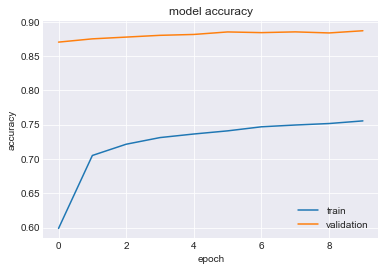

In [29]:
# plt.subplot()
plt.style.use('seaborn-darkgrid')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

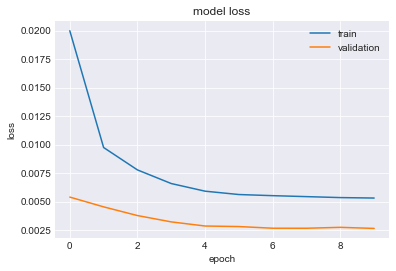

In [30]:
plt.style.use('seaborn-darkgrid')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')

# <font color='green'>Prepare the validation set</font>

In [31]:
X_test = []
# y_train = []
for i in range(len(training_set_scaled)-60-1):
    X_test.append(training_set_scaled[i:i+60])
#     y_train.append(training_set_scaled[i+60+1])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[2], X_test.shape[1]))
predicted = regressor.predict(X_test)
predicted = sc.inverse_transform(predicted)

# <font color='green'>Plotting real and predicted values</font>

Text(0.5, 1.0, 'SST')

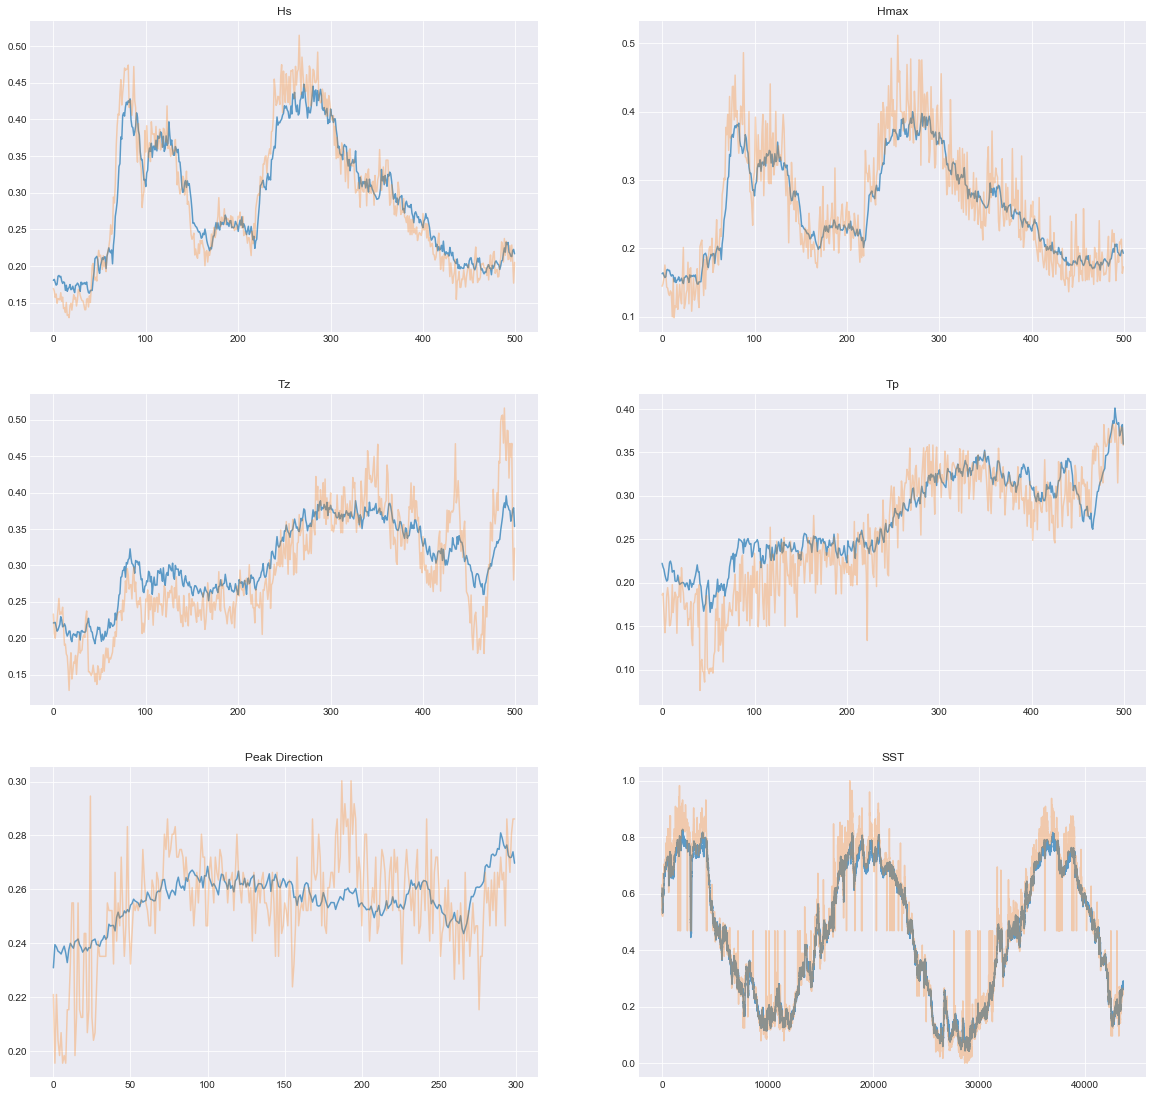

In [32]:
plt.figure(figsize=(20,40))
plt.subplot(6, 2, 1)

plt.style.use('seaborn-darkgrid')
plt.plot(predicted[:500,0], alpha=0.7)
plt.plot(y_train[:500,0], alpha=0.3)
plt.title('Hs')

plt.subplot(6,2,2)
plt.style.use('seaborn-darkgrid')
plt.plot(predicted[:500,1], alpha=0.7)
plt.plot(y_train[:500,1], alpha=0.3)
plt.title('Hmax')

plt.subplot(6,2,3)
plt.style.use('seaborn-darkgrid')
plt.plot(predicted[:500,2], alpha=0.7)
plt.plot(y_train[:500,2], alpha=0.3)
plt.title('Tz')

plt.subplot(6,2,4)
plt.style.use('seaborn-darkgrid')
plt.plot(predicted[:500,3], alpha=0.7)
plt.plot(y_train[:500,3], alpha=0.3)
plt.title('Tp')

plt.subplot(6,2,5)
plt.style.use('seaborn-darkgrid')
plt.plot(predicted[200:500,4], alpha=0.7)
plt.plot(y_train[200:500,4], alpha=0.3)
plt.title('Peak Direction')

plt.subplot(6,2,6)
plt.style.use('seaborn-darkgrid')
plt.plot(predicted[:,5], alpha=0.7)
plt.plot(y_train[:,5], alpha=0.3)
plt.title('SST')

![](https://media.giphy.com/media/3oD3YveOJWdwIAfZ5e/giphy.gif)

![](https://www.api.org/~/media/EnergyTomorrow/blog/2016/December-images/holiday-offshore.gif?la=en)

![](https://thumbs.gfycat.com/HotGargantuanAppaloosa-size_restricted.gif)